<a href="https://colab.research.google.com/github/guo8orou/practice/blob/main/groupby%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv

--2021-11-23 15:52:14--  https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv
Resolving www.shanelynn.ie (www.shanelynn.ie)... 104.236.88.249
Connecting to www.shanelynn.ie (www.shanelynn.ie)|104.236.88.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40576 (40K) [text/csv]
Saving to: ‘phone_data.csv’

phone_data.csv      100%[===================>]  39.62K  --.-KB/s    in 0.007s  

2021-11-23 15:52:14 (5.19 MB/s) - ‘phone_data.csv’ saved [40576/40576]



In [3]:
import pandas as pd
df=pd.read_csv("phone_data.csv")

날짜 데이터 형식으로 바꾸기

In [5]:
df.dtypes #date(날짜)가 object

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [6]:
df['date'].head()

0    15/10/14 06:58
1    15/10/14 06:58
2    15/10/14 14:46
3    15/10/14 14:48
4    15/10/14 17:27
Name: date, dtype: object

In [7]:
import  dateutil

df['date']=df['date'].apply(dateutil.parser.parse, dayfirst=True)

In [8]:
df['date'].head() #데이터 타입이 datetime64로 변경

0   2014-10-15 06:58:00
1   2014-10-15 06:58:00
2   2014-10-15 14:46:00
3   2014-10-15 14:48:00
4   2014-10-15 17:27:00
Name: date, dtype: datetime64[ns]

In [9]:
df.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


월별 통화지속 시간 합

In [10]:
df.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [12]:
df.groupby('month')['duration'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: duration, dtype: int64

한줄 코드 시각화

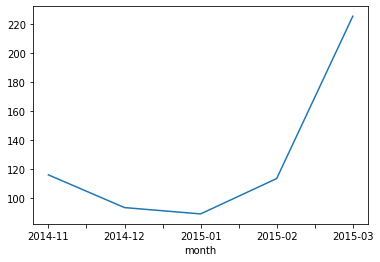

In [13]:
#matplotlib 설치되어 있으면 import 안해도 .plot()으로 그려짐. 충격.
df.groupby('month')['duration'].mean().plot()

In [15]:
df.item.unique()

array(['data', 'call', 'sms'], dtype=object)

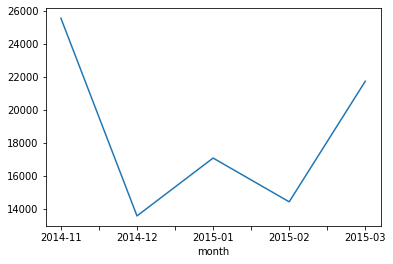

In [17]:
df[df['item']=='call'].groupby('month')['duration'].sum().plot()

In [23]:
df.groupby(['month','item'])['duration'].mean()

month    item
2014-11  call    238.757009
         data     34.429000
         sms       1.000000
2014-12  call    171.658228
         data     34.429000
         sms       1.000000
2015-01  call    193.977273
         data     34.429000
         sms       1.000000
2015-02  call    215.164179
         data     34.429000
         sms       1.000000
2015-03  call    462.276596
         data     34.429000
         sms       1.000000
Name: duration, dtype: float64

In [24]:
df.groupby(['month','item'])['duration'].mean().unstack() #table 출력

item,call,data,sms
month,,,
2014-11,238.757009,34.429,1.0
2014-12,171.658228,34.429,1.0
2015-01,193.977273,34.429,1.0
2015-02,215.164179,34.429,1.0
2015-03,462.276596,34.429,1.0


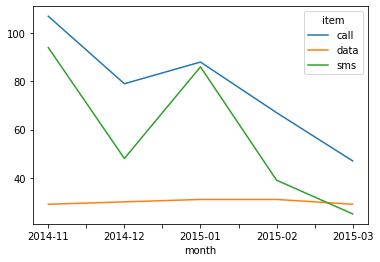

In [26]:
df.groupby(['month','item'])['duration'].count().unstack().plot() #셋상에,,,

In [28]:
df.groupby('month', as_index=False).count()
#groupby는 as_index=True가 기본, Flase면 unstack()과 같은 효과?

,month,index,date,duration,item,network,network_type
0,2014-11,230,230,230,230,230,230
1,2014-12,157,157,157,157,157,157
2,2015-01,205,205,205,205,205,205
3,2015-02,137,137,137,137,137,137
4,2015-03,101,101,101,101,101,101


In [29]:
df.groupby('month', as_index=False).agg({'duration':'mean'})
#'열':'함수', 함수가 str로 쓰였다

,month,duration
0,2014-11,115.823657
1,2014-12,93.260318
2,2015-01,88.894141
3,2015-02,113.301453
4,2015-03,225.251891


In [32]:
df.groupby('month').agg({'duration':'mean'}).reset_index()
#as_index=False와 .reset_index()의 효과가 동일

,month,duration
0,2014-11,115.823657
1,2014-12,93.260318
2,2015-01,88.894141
3,2015-02,113.301453
4,2015-03,225.251891


#다채로운 agg 사용

In [33]:
df.groupby('month').agg({'duration':'mean',
                         'network_type':'count',
                         'date':'first'})  #그룹의 첫 관측치

,duration,network_type,date
month,,,
2014-11,115.823657,230,2014-10-15 06:58:00
2014-12,93.260318,157,2014-11-13 06:58:00
2015-01,88.894141,205,2014-12-13 06:58:00
2015-02,113.301453,137,2015-01-13 06:58:00
2015-03,225.251891,101,2015-02-12 20:15:00


In [43]:
df.groupby(['month','item']).agg({'duration':['mean', min, max],
                                  'network_type':'count',
                                  'date':['first', 'nunique']})
#Wow... 
#함수 파트 list 가능 / min, max, sum 등은 str처럼 사용하지 않음

duration          ...                date        
                    mean     min  ...               first nunique
month   item                      ...                            
2014-11 call  238.757009   1.000  ... 2014-10-15 06:58:00     104
        data   34.429000  34.429  ... 2014-10-15 06:58:00      29
        sms     1.000000   1.000  ... 2014-10-16 22:18:00      79
2014-12 call  171.658228   2.000  ... 2014-11-14 17:24:00      76
        data   34.429000  34.429  ... 2014-11-13 06:58:00      30
        sms     1.000000   1.000  ... 2014-11-14 17:28:00      41

[6 rows x 6 columns]

In [57]:
import numpy as np
gd=df.groupby('month').agg({'duration':[min, np.mean]})

In [61]:
gd

,min,mean
month,,
2014-11,1.0,115.823657
2014-12,1.0,93.260318
2015-01,1.0,88.894141
2015-02,1.0,113.301453
2015-03,1.0,225.251891


In [59]:
gd.columns=gd.columns.droplevel(level=0) #두번 하면 오류남
gd #level 'duration'이 삭제됨 (-> 그룹화 index가 아님?)

,min,mean
month,,
2014-11,1.0,115.823657
2014-12,1.0,93.260318
2015-01,1.0,88.894141
2015-02,1.0,113.301453
2015-03,1.0,225.251891


In [62]:
#열이름 재설정 
gd.rename(columns={'min':'min_duration', 'mean':'mean_duration'})

,min_duration,mean_duration
month,,
2014-11,1.0,115.823657
2014-12,1.0,93.260318
2015-01,1.0,88.894141
2015-02,1.0,113.301453
2015-03,1.0,225.251891


In [65]:
#droplevel 후 요약에 사용된 기존 변수이름 보존
gd.add_prefix('duration:')

,duration:min,duration:mean
month,,
2014-11,1.0,115.823657
2014-12,1.0,93.260318
2015-01,1.0,88.894141
2015-02,1.0,113.301453
2015-03,1.0,225.251891
